<a href="https://colab.research.google.com/github/luis314159/portfolio/blob/master/spectograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en ingeniería en computación 
##<center>Procesamiento de señales
##<center>Trabajo: Banco de Filtros de Mel
###<center>Catedrático: Dr. Alain Manzo Martínez 
###<center>Estudiante: Ing. Luis Ángel Almazán López</center>
<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->

In [ ]:
#@title Banco de filtros de Mel
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Frecuencia de muestreo :  22050
Frecuencia de Muestreo:  22050
Tamaño de la muestra : 330750
Tamaño del frame en muestras:  441
Traslape en muestras:  220
Número de frames para analizar : 1502
Mitad de muestras : 220
Frecuencias en el espectrograma : [    0.            50.11363636   100.22727273   150.34090909
   200.45454545   250.56818182   300.68181818   350.79545455
   400.90909091   451.02272727   501.13636364   551.25
   601.36363636   651.47727273   701.59090909   751.70454545
   801.81818182   851.93181818   902.04545455   952.15909091
  1002.27272727  1052.38636364  1102.5         1152.61363636
  1202.72727273  1252.84090909  1302.95454545  1353.06818182
  1403.18181818  1453.29545455  1503.40909091  1553.52272727
  1603.63636364  1653.75        1703.86363636  1753.97727273
  1804.09090909  1854.20454545  1904.31818182  1954.43181818
  2004.54545455  2054.65909091  2104.77272727  2154.88636364
  2205.          2255.11363636  2305.22727273  2355.34090909
  2405.45454545  2455.5

Text(0.5, 0, 'Frecuencia Hz')

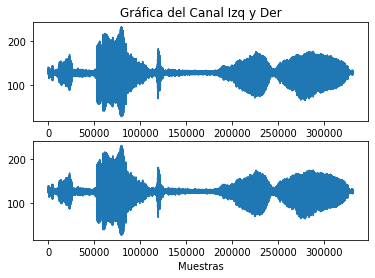

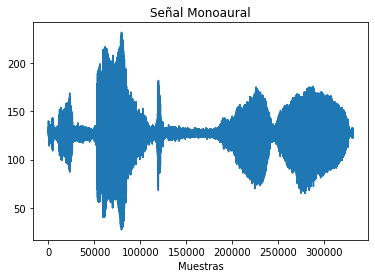

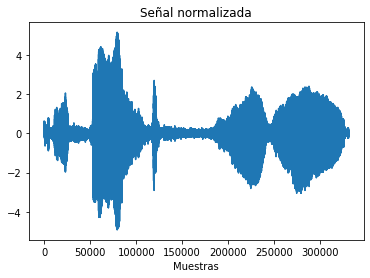

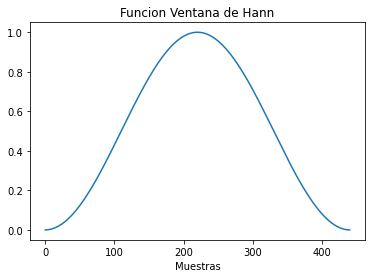

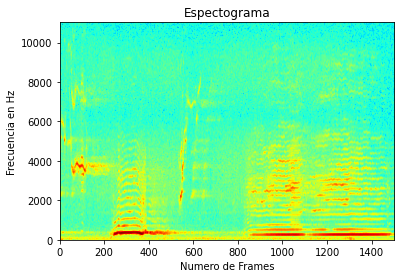

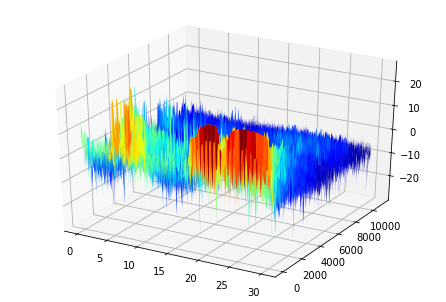

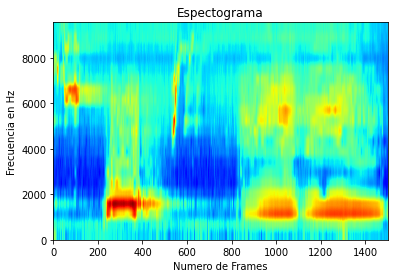

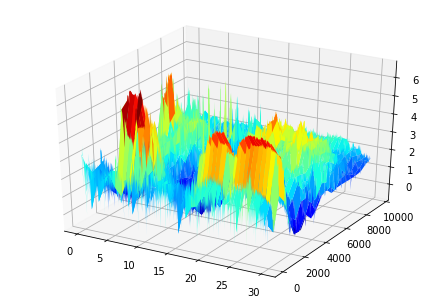

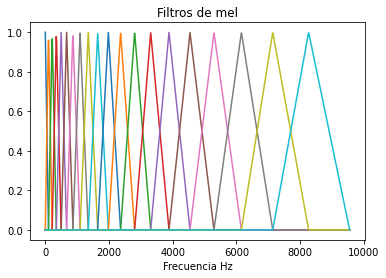

In [ ]:

import scipy.io.wavfile as rd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

class espectrograma:
    
    def __init__(self,audio_signal,fs,frame_size,overlap,M):
        self.audio = audio_signal
        self.sampling_frec = fs
        self.monoaural = self.__Stereo()
        self.norm = self.__Norma()
        self.length = len(self.norm)
        self.number_frame_samples = int(np.fix( frame_size * fs ))
        self.number_overlap_samples = int(np.fix(self.number_frame_samples-self.number_frame_samples*overlap/100))
        self.number_frames = self.__nFrames()
        self.half_samples = int(np.fix(self.number_frame_samples/2))
        self.Hann_window = self.__Window()
        self.freq = self.__Frequency()
        self.spect, self.spect2 = self.__Spect()
        self.M=M
        self.freq_c=self.__Freq_c()
        self.mel_filt = self.__Mel_filter()
        self.mfiltered=self.__Mfiltered() 
        self.filtro,self.filtrox=self.__filtro()  
        
    def __Stereo(self):
        n_channels = len(np.shape(self.audio))
        #print(n_channels)
        if n_channels > 1:
            temp_1 = self.audio[:,0]
            temp_2 = self.audio[:,1]
            avg = (temp_1 + temp_2)/2
        else:
            avg = self.audio
        return avg
    
    def __Norma(self):
        #return np.zeros(5)
        mean = np.mean(self.monoaural)
        std = np.std(self.monoaural)
        norm_signal = (self.monoaural-mean)/std
        return norm_signal
    
    def __nFrames(self):
        cont = 0
        i = 0 
        while(cont <self.length):
            cont = i*self.number_overlap_samples + self.number_frame_samples
            i +=1
        return i-1
    
    def __Window(self):
        W = np.zeros(self.number_frame_samples)
        mod = self.number_frame_samples%2
        if mod == 0:
            end = self.half_samples
        else:
            end = self.half_samples + 1
        
        for n in range(-self.half_samples,end):
            W[n + self.half_samples] = 0.5 + 0.5*np.cos(2*np.pi*n/self.number_frame_samples)
        return W
    
    def __Frequency(self):
        mod = self.number_frame_samples%2
        if mod == 0:
            end = self.half_samples
            f = np.zeros(end)
        else:
            end = self.half_samples + 1
            f = np.zeros(end)
            
        for n in range(0,end):
           f[n] = (n*fs)/(self.number_frame_samples - 1)
        return f
    
    def __Spect(self):
        frame_data = np.zeros(self.number_frame_samples)
        
        mod = self.number_frame_samples%2
        if mod == 0:
            end = self.half_samples
        else:
            end = self.half_samples + 1
            
            
        energy_matrix = np.zeros((end,self.number_frames))
        energy_matrix2=energy_matrix.copy()
        for n in range(0,self.number_frames):
            frame_data = self.norm[n*self.number_overlap_samples:n*self.number_overlap_samples+self.number_frame_samples]
            # plt.figure(5)
            # plt.subplot(211)
            # plt.plot(frame_data)
            
            #verifica si el frame tiene energia cero
            energy = np.sum(frame_data**2)
            if energy !=0:
                frame_data = frame_data * self.Hann_window
                # plt.subplot(212)
                # plt.plot(frame_data)
     
                ftd = np.fft.fft(frame_data)
                mag = np.abs(ftd)
                # plt.figure(6)
                # plt.subplot(212)
                # plt.plot(self.freq,mag[0:self.half_samples+1])                
                # plt.show()
                
                energy_matrix2[0:end,n] = mag[0:end].copy()

                energy_matrix[0:end,n] = 10*np.log10(mag[0:end].copy())
                

                
                
                #energy_matrix2=np.zeros(np.shape(energy_matrix))
                
                
        #print(energy_matrix2)
        #energy_matrix2=energy_matrix.copy()
        return energy_matrix, energy_matrix2

    def __Freq_c(self):
        
        
        
        mel_freq=2595*np.log10((self.freq/700)+1)
        
        mel_min=mel_freq[0]
        
        mel_max=mel_freq[-1]
        
        del_mel=(mel_max-mel_min)/(M+1)
        
        #vector "m"
        
        m=np.arange(0,M+1)        
        
        mel_c=m*del_mel
        
        #frecuencia central en heartz
        
        freq_c=700*(10**(mel_c/2595)-1)
        
        np.append(freq_c,self.freq[-1])
        
        freq_c2=np.zeros(M+1)
        for i,j in enumerate(freq_c):
            freq_c2[i]=j
        freq_c2[-1]=self.freq[-1]
        return freq_c
    
    def __Mel_filter(self):
        
        
        m=np.arange(0,M+1)  
        
        f=len(self.freq)
        f2=len(self.freq_c)
        K=len(m)
        
        H=np.zeros((f,K))
        FK=np.zeros(f2+1)
        
        for i,j in enumerate(self.freq_c):
            FK[i]=j
            
        FK[-1]=self.freq[-1]
        
        
            
    
        for n,fk in enumerate(self.freq):
            #print(n,fk)
            
            for j in m:
                #print(j)
                #4 casos 
                if fk < j:
                    
                    
                    H[n][j]=0
                    
                if self.freq_c[j-1]<=fk and fk <=self.freq_c[j]:
                    
                    H[n][j]=(fk-self.freq_c[j-1])/(self.freq_c[j]-self.freq_c[j-1])
                    
                    
                if  self.freq_c[j]<=fk and fk <=FK[j+1]:
                    
                    H[n][j]=(fk-FK[j+1])/(self.freq_c[j]-FK[j+1])
                    
                if fk > j+1:
        
                    H[n][j]
                    
                    
        return H
    
    
    def __Mfiltered(self):

        
        #Se ocupara la transpuesta de la matiz "self.mel_filt"
        
        trans=np.transpose(self.mel_filt.copy())
        filtered = np.dot(trans,(np.abs(self.spect2.copy())))
        filtered2 = np.log(filtered)

    
        return filtered2

    
    def __filtro(self):

        hd=np.linspace(self.freq_c[0],self.freq_c[-1],1000)

              
        m=np.arange(0,M)  
        
        f=len(hd)
        f2=len(self.freq_c)
        K=len(m)
        
        H=np.zeros((f,K))
        FK=np.zeros(f2+1)
        
        for i,j in enumerate(self.freq_c):
            FK[i]=j
            
        FK[-1]=self.freq[-1]
            
            
        for n,fk in enumerate(hd):
            #print(n,fk)
            
            for j in m:
                #print(j)
                #4 casos 
                if fk < j:
                    
                    
                    H[n][j]=0
                    
                if self.freq_c[j-1]<=fk and fk <=self.freq_c[j]:
                    
                    H[n][j]=(fk-self.freq_c[j-1])/(self.freq_c[j]-self.freq_c[j-1])
                    
                    
                if  self.freq_c[j]<=fk and fk <=FK[j+1]:
                    
                    H[n][j]=(fk-FK[j+1])/(self.freq_c[j]-FK[j+1])
                    
                if fk > j+1:
        
                    H[n][j]
                    
        #print(FK[-1])
        return H,hd
                    
#Abre Archivo de Audio
fs, audio_signal = rd.read('/content/drive/MyDrive/procesamiento/ballena.wav')
#Parámetros de usuario
#Tamaño de frame en segundos 
frame_size = 0.020
#Traslape entre frames en porcentaje
overlap = 50


#Número de triangulos, "M"

M=20


#Crea objeto de la clase espectograma
spectro = espectrograma(audio_signal,fs,frame_size,overlap,M)

#Despliega en consola la frecuencia de muestreo
 
print("Frecuencia de muestreo : ", spectro.sampling_frec)


#Despliega en consola la frecuencia de muestreo
print('Frecuencia de Muestreo: ',spectro.sampling_frec)
#Gráfica de la señal
plt.figure(1) 
plt.subplot(211)       
plt.plot(spectro.audio)
plt.title('Gráfica del Canal Izq y Der')
plt.subplot(212) 
plt.plot(spectro.audio)
plt.xlabel('Muestras')
#Gráfica de la señal promediada

#Grafica de la señal promediada
plt.figure(2)
plt.plot(spectro.monoaural)
plt.title('Señal Monoaural')
plt.xlabel('Muestras')

#Grafica de la señal normalizada

plt.figure(3)
plt.plot(spectro.norm)
plt.title('Señal normalizada')
plt.xlabel('Muestras')

print("Tamaño de la muestra :", spectro.length)
print("Tamaño del frame en muestras: ", spectro.number_frame_samples)
print("Traslape en muestras: ", spectro.number_overlap_samples)
print("Número de frames para analizar :", spectro.number_frames)
print("Mitad de muestras :", spectro.half_samples)

#Grafica normalizada
plt.figure(4)
plt.plot(spectro.Hann_window)
plt.title('Funcion Ventana de Hann')
plt.xlabel('Muestras')

print("Frecuencias en el espectrograma :", spectro.freq)


mod = spectro.number_frame_samples%2
if mod == 0:
        end = spectro.half_samples
else:
        end = spectro.half_samples + 1
        f = np.zeros(end)

plt.figure(7)
plt.imshow(spectro.spect[::-1],cmap = plt.get_cmap('jet'),
           extent=[0,spectro.number_frames,0,spectro.freq[-1]],
           aspect="auto")
plt.title('Espectograma')
plt.xlabel('Numero de Frames')
plt.ylabel('Frecuencia en Hz')

#Grafico en 3D
fig = plt.figure(8)
axes3d = Axes3D(fig)
x=np.linspace(0,spectro.number_frames/overlap,spectro.number_frames)
y=np.linspace(spectro.freq[-1],0,end)
X,Y= np.meshgrid(x,y)
axes3d.plot_surface(X,Y,spectro.spect[::-1],cmap='jet')




plt.figure(9)
plt.imshow(spectro.mfiltered[::-1],cmap = plt.get_cmap('jet'),
           extent=[0,spectro.number_frames,0,spectro.freq_c[-1]],
           aspect="auto")
plt.title('Espectograma')
plt.xlabel('Numero de Frames')
plt.ylabel('Frecuencia en Hz')

#Grafico en 3D
end=len(spectro.freq_c)
fig = plt.figure(10)
axes3d = Axes3D(fig)
x=np.linspace(0,spectro.number_frames/overlap,spectro.number_frames)
y=np.linspace(spectro.freq_c[-1],0,end)
X,Y= np.meshgrid(x,y)
print(spectro.mfiltered.shape)
print(X.shape)
print(Y.shape)
axes3d.plot_surface(X,Y,spectro.mfiltered[::-1],cmap='jet')


plt.figure(11)
print(np.shape(spectro.filtro))
for i in np.transpose(spectro.filtro):
  plt.plot(spectro.filtrox,i)
plt.title('Filtros de Mel')
plt.xlabel('Frecuencia Hz')







#Conclusiones 
Los bancos de filtros de Mel permiten representar la información de una manera más compacta y de manera similar a como las personas escuchan.

Esto se asemeja a como si se tuvieran sierta cantidad de sensores que detectan la amplitud de la onda entre ciertos limites de frecuencia, teniendo una frecuencia central donde detecta la magnitid por igual y para los valores más alejados(tanto izquierda y derecha) detecta valores menores.

Está escala es logaritmica, tal y como lo es la forma en la que escuchamos y los filtros forman estas figuras de triangulos que se pueden observar en la imagen anterior.


Al aplicar los filtros de Mel y comparar ambos espectogramas se puede observar como si la información ubiera perdido definición o como si se le ubiera aplicado blur a la imagen. Esto es de esperarce pues hemos colocado varias frecuencias en unas mismas bandas. 